In [80]:
!pip install onboard.client
from onboard.client import RtemClient
from onboard.client.models import PointSelector, TimeseriesQuery, PointData
from onboard.client.dataframes import points_df_from_streaming_timeseries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pytz
from datetime import datetime, timezone, timedelta
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
api_key = ...
client = RtemClient(api_key=api_key)

In [82]:
query = PointSelector()
query.buildings = [146]
points_146 = client.select_points(query)['points']
sensor_metadata_146 = pd.DataFrame(client.get_points_by_ids(points_146))
sensor_metadata_146.head()


,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,tagged_units,raw_unit_id,value,type,point_type_id,measurement_id,datasource_hash,topic,state_text,equip_id
0,198668,146,1.577854e+12,1.544850e+12,,None,,,"New York, NY Humidity",%,None,3,null,Outside Air Humidity,98,2,16ed12743a27c646ebefa7bc529bf95f,"nyserda+0000092485+Site-Sensor+New York, NY Hu...",None,18169
1,198669,146,1.577854e+12,1.544850e+12,,None,,,"New York, NY Temp",F,None,2,null,Outside Air Temperature,76,1,e77bf3add5ad02fa1a94682ebc24ab16,"nyserda+0000092485+Site-Sensor+New York, NY Temp",None,18169
2,198670,146,1.577833e+12,1.544850e+12,,None,,,Occupancy,Occ,None,18,FALSE,Occupancy Status,177,10,bc6dbd1f6b8415eb29d996f405118be6,nyserda+0000092485+Site-Sensor+Occupancy,None,18169
3,198671,146,1.577854e+12,1.544850e+12,,None,,,Meter Data Elec Meter Curtailment,,None,23,0,Virtual,434,18,6953de44942db335576918fa692b07f2,nyserda+0000092485+Site-Virtual+Meter Data Ele...,None,18170
4,198672,146,1.577854e+12,1.544850e+12,,None,,,Meter Data Elec Meter Total Building Electric,,None,23,332.02,Virtual,434,18,b5196592e68d03c73afe5b16ba0928f9,nyserda+0000092485+Site-Virtual+Meter Data Ele...,None,18170


In [83]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [86]:
is_float = [is_number(s) for s in sensor_metadata_146['value'].tolist()]
temp_or_hum = ((sensor_metadata_146['id']==198668) | (sensor_metadata_146['id']==198669))
#elec_meter = sensor_metadata_146['id']==198672
floor15 = sensor_metadata_146['description'].str.contains('Floor 15')
nosetpoint = sensor_metadata_146['description'].str.lower().str.contains('setpoint')
onoff = sensor_metadata_146['units'] == 'On/Off'

sensor_metadata_146_f15 = sensor_metadata_146[(is_float & ~nosetpoint & ~onoff & floor15) | temp_or_hum]
sensor_metadata_146_f15

,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,tagged_units,raw_unit_id,value,type,point_type_id,measurement_id,datasource_hash,topic,state_text,equip_id
0,198668,146,1.577854e+12,1.544850e+12,,None,,,"New York, NY Humidity",%,None,3,null,Outside Air Humidity,98,2,16ed12743a27c646ebefa7bc529bf95f,"nyserda+0000092485+Site-Sensor+New York, NY Hu...",None,18169
1,198669,146,1.577854e+12,1.544850e+12,,None,,,"New York, NY Temp",F,None,2,null,Outside Air Temperature,76,1,e77bf3add5ad02fa1a94682ebc24ab16,"nyserda+0000092485+Site-Sensor+New York, NY Temp",None,18169
64,198732,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - EconoAvail,,None,23,1,Virtual,434,18,a2dfab82ae235e3c0000a664dab0adfa,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - E...,None,18178
65,198733,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - EconoLkOtSpt,,None,23,65,Virtual,434,18,672b125d0bcd345ecd6ebf7435437c93,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - E...,None,18178
66,198734,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - ECWTemp,,None,23,62.44,Virtual,434,18,5b85f6d6cdf4cfb7699d6899768663a9,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - E...,None,18178
67,198735,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - iHWSTemp,F,None,2,94.61,Hot Water Supply Temperature,88,1,b945028837bf2be085689955f392d832,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - i...,None,18178
68,198736,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - MATempLoLmt,,None,23,40,Virtual,434,18,10636841506388bbea36a5983c2050f2,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - M...,None,18178
69,198737,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - OADMin,,None,23,10,Virtual,434,18,b1a29324ecb2719979c7bc6d9e802c98,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - O...,None,18178
70,198738,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - OADMR,%,None,3,0,Outside Air Damper Position,148,7,7c397d2d8519ed430355bfd3acee0e68,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - O...,None,18178
71,198739,146,1.577854e+12,1.544850e+12,,None,,,AHUs AHU Floor 15 - RACO2,ppm,None,10,390.88,Return Air Carbon Dioxide,120,6,b41a1714cdff63792480a69803131a3d,nyserda+0000092485+ahu15+AHUs AHU Floor 15 - R...,None,18178


In [87]:
#sensor_metadata_146_f15_nosetpoint = sensor_metadata_146_f15[~sensor_metadata_146_f15['description'].str.lower().str.contains('setpoint')]
#sensor_metadata_146_f15_nosetpoint.head()

In [88]:
point_ids = sensor_metadata_146_f15.iloc[:,0].tolist()
columns_renamed = [(str(tp)+"_"+ str(pt)) for pt,tp in zip(point_ids, sensor_metadata_146_f15['type'].tolist())]
columns_renamed_dict = dict(zip(point_ids, columns_renamed))


In [89]:
print(sensor_metadata_146_f15.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max())
print(sensor_metadata_146_f15.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min())

2018-12-15 05:00:00+00:00
2020-01-01 04:45:00+00:00


In [93]:
# Select your timezone
tz = pytz.timezone('UTC')

# Select your date and time (time is optional)
start = datetime(2019,7,1,0,0,0).replace(tzinfo=tz)
end = datetime(2019,7,31,0,0,0).replace(tzinfo=tz)

print(f"from {start} to {end}")

from 2019-07-01 00:00:00+00:00 to 2019-07-31 00:00:00+00:00


In [102]:
timeseries_query = TimeseriesQuery(point_ids = sensor_metadata_146_f15['id'].tolist(), start = start, end = end)

# Exceute query (will return and object)
query_results = client.stream_point_timeseries(timeseries_query)

# Convert to dataframe
timeseries_b146_f15 = points_df_from_streaming_timeseries(query_results)
timeseries_b146_f15.head()

,timestamp,198746,198668,198669,198732,198733,198734,198735,198736,198737,198738,198739,198740,198741,198742,198743,198744,198745
0,2019-07-01T00:15:00Z,76.26,None,NaN,None,None,None,86.85,None,None,0.0,416.57,None,1000.0,100.0,77.46,77.23,13.563638
1,2019-07-01T00:30:00Z,76.26,None,NaN,None,None,None,86.86,None,None,0.0,417.05,None,1000.0,100.0,77.46,77.20,13.563638
2,2019-07-01T00:45:00Z,76.26,None,NaN,None,None,None,86.85,None,None,0.0,415.18,None,1000.0,100.0,77.46,77.18,13.563638
3,2019-07-01T01:00:00Z,76.26,None,76.0,None,None,None,86.86,None,None,0.0,415.89,None,1000.0,100.0,77.46,77.14,13.563638
4,2019-07-01T01:15:00Z,76.26,None,NaN,None,None,None,86.82,None,None,0.0,414.17,None,1000.0,100.0,77.46,77.15,13.563638


In [103]:
timeseries_b146_f15["timestamp"] = pd.to_datetime(timeseries_b146_f15['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
timeseries_b146_f15.set_index('timestamp', inplace=True)


In [104]:
timeseries_b146_f15 = timeseries_b146_f15.resample('15T').mean()
timeseries_b146_f15.head()

,198746,198669,198735,198738,198739,198741,198742,198743,198744,198745
timestamp,,,,,,,,,,
2019-07-01 00:15:00+00:00,76.26,NaN,86.85,0.0,416.57,1000.0,100.0,77.46,77.23,13.563638
2019-07-01 00:30:00+00:00,76.26,NaN,86.86,0.0,417.05,1000.0,100.0,77.46,77.20,13.563638
2019-07-01 00:45:00+00:00,76.26,NaN,86.85,0.0,415.18,1000.0,100.0,77.46,77.18,13.563638
2019-07-01 01:00:00+00:00,76.26,76.0,86.86,0.0,415.89,1000.0,100.0,77.46,77.14,13.563638
2019-07-01 01:15:00+00:00,76.26,NaN,86.82,0.0,414.17,1000.0,100.0,77.46,77.15,13.563638


In [105]:
timeseries_b146_f15 = timeseries_b146_f15.drop(labels=[198735,198738,198741,198742,198745],axis=1)
timeseries_b146_f15.head()

,198746,198669,198739,198743,198744
timestamp,,,,,
2019-07-01 00:15:00+00:00,76.26,NaN,416.57,77.46,77.23
2019-07-01 00:30:00+00:00,76.26,NaN,417.05,77.46,77.20
2019-07-01 00:45:00+00:00,76.26,NaN,415.18,77.46,77.18
2019-07-01 01:00:00+00:00,76.26,76.0,415.89,77.46,77.14
2019-07-01 01:15:00+00:00,76.26,NaN,414.17,77.46,77.15


In [106]:
timeseries_b146_f15['Avg Return Air Temp_198743_198744'] = 0.5*timeseries_b146_f15[198743] + 0.5*timeseries_b146_f15[198744]
timeseries_b146_f15 = timeseries_b146_f15.drop(labels=[198743,198744],axis=1)
timeseries_b146_f15.head()


,198746,198669,198739,Avg Return Air Temp_198743_198744
timestamp,,,,
2019-07-01 00:15:00+00:00,76.26,NaN,416.57,77.345
2019-07-01 00:30:00+00:00,76.26,NaN,417.05,77.330
2019-07-01 00:45:00+00:00,76.26,NaN,415.18,77.320
2019-07-01 01:00:00+00:00,76.26,76.0,415.89,77.300
2019-07-01 01:15:00+00:00,76.26,NaN,414.17,77.305


In [107]:
header = [col for col in timeseries_b146_f15]

timeseries_b146_f15['delta_T'] = timeseries_b146_f15['Avg Return Air Temp_198743_198744'] - timeseries_b146_f15[header[0]]

# convert delta_T to absolute value
timeseries_b146_f15['delta_T'] = timeseries_b146_f15['delta_T'].abs()
timeseries_b146_f15_renamed = timeseries_b146_f15.rename(columns = columns_renamed_dict)
timeseries_b146_f15_renamed.head()

,Supply Air Temperature_198746,Outside Air Temperature_198669,Return Air Carbon Dioxide_198739,Avg Return Air Temp_198743_198744,delta_T
timestamp,,,,,
2019-07-01 00:15:00+00:00,76.26,NaN,416.57,77.345,1.085
2019-07-01 00:30:00+00:00,76.26,NaN,417.05,77.330,1.070
2019-07-01 00:45:00+00:00,76.26,NaN,415.18,77.320,1.060
2019-07-01 01:00:00+00:00,76.26,76.0,415.89,77.300,1.040
2019-07-01 01:15:00+00:00,76.26,NaN,414.17,77.305,1.045


In [108]:
#get differentials
"""
timeseries_b146_f15_diffs = timeseries_b146_f15.diff()
timeseries_b146_f15_diffs_renamed = timeseries_b146_f15_diffs.rename(columns = columns_renamed_dict)
timeseries_b146_f15_diffs_renamed.head()
"""

'\ntimeseries_b146_f15_diffs = timeseries_b146_f15.diff()\ntimeseries_b146_f15_diffs_renamed = timeseries_b146_f15_diffs.rename(columns = columns_renamed_dict)\ntimeseries_b146_f15_diffs_renamed.head()\n'

In [109]:

t = []
for ts in timeseries_b146_f15.index.tolist():
  if ts.date().weekday() == 5 or ts.date().weekday() == 6:
    t.append('Weekend')
  elif ts.time().hour < 6 and ts.time().hour >= 18:
    t.append('Weekdays Off Hours')
  elif ts.time().hour >= 6 and ts.time().hour < 8:
    t.append('Weekdays 6-8am')
  elif ts.time().hour >= 8 and ts.time().hour < 10:
    t.append('Weekdays 8-10am')
  elif ts.time().hour >= 10 and ts.time().hour < 12:
    t.append('Weekdays 10-12pm')
  elif ts.time().hour >= 12 and ts.time().hour < 14:
    t.append('Weekdays 12-2pm')
  elif ts.time().hour >= 14 and ts.time().hour < 16:
    t.append('Weekdays 2-4pm')
  elif ts.time().hour >= 16 and ts.time().hour < 18:
    t.append('Weekdays 4-6pm')
  else:
    t.append('Weekdays Off Hours')

In [110]:


timeseries_b146_f15_renamed['Time'] = t
#timeseries_b146_f15_diffs_renamed['Time'] = t_diffs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

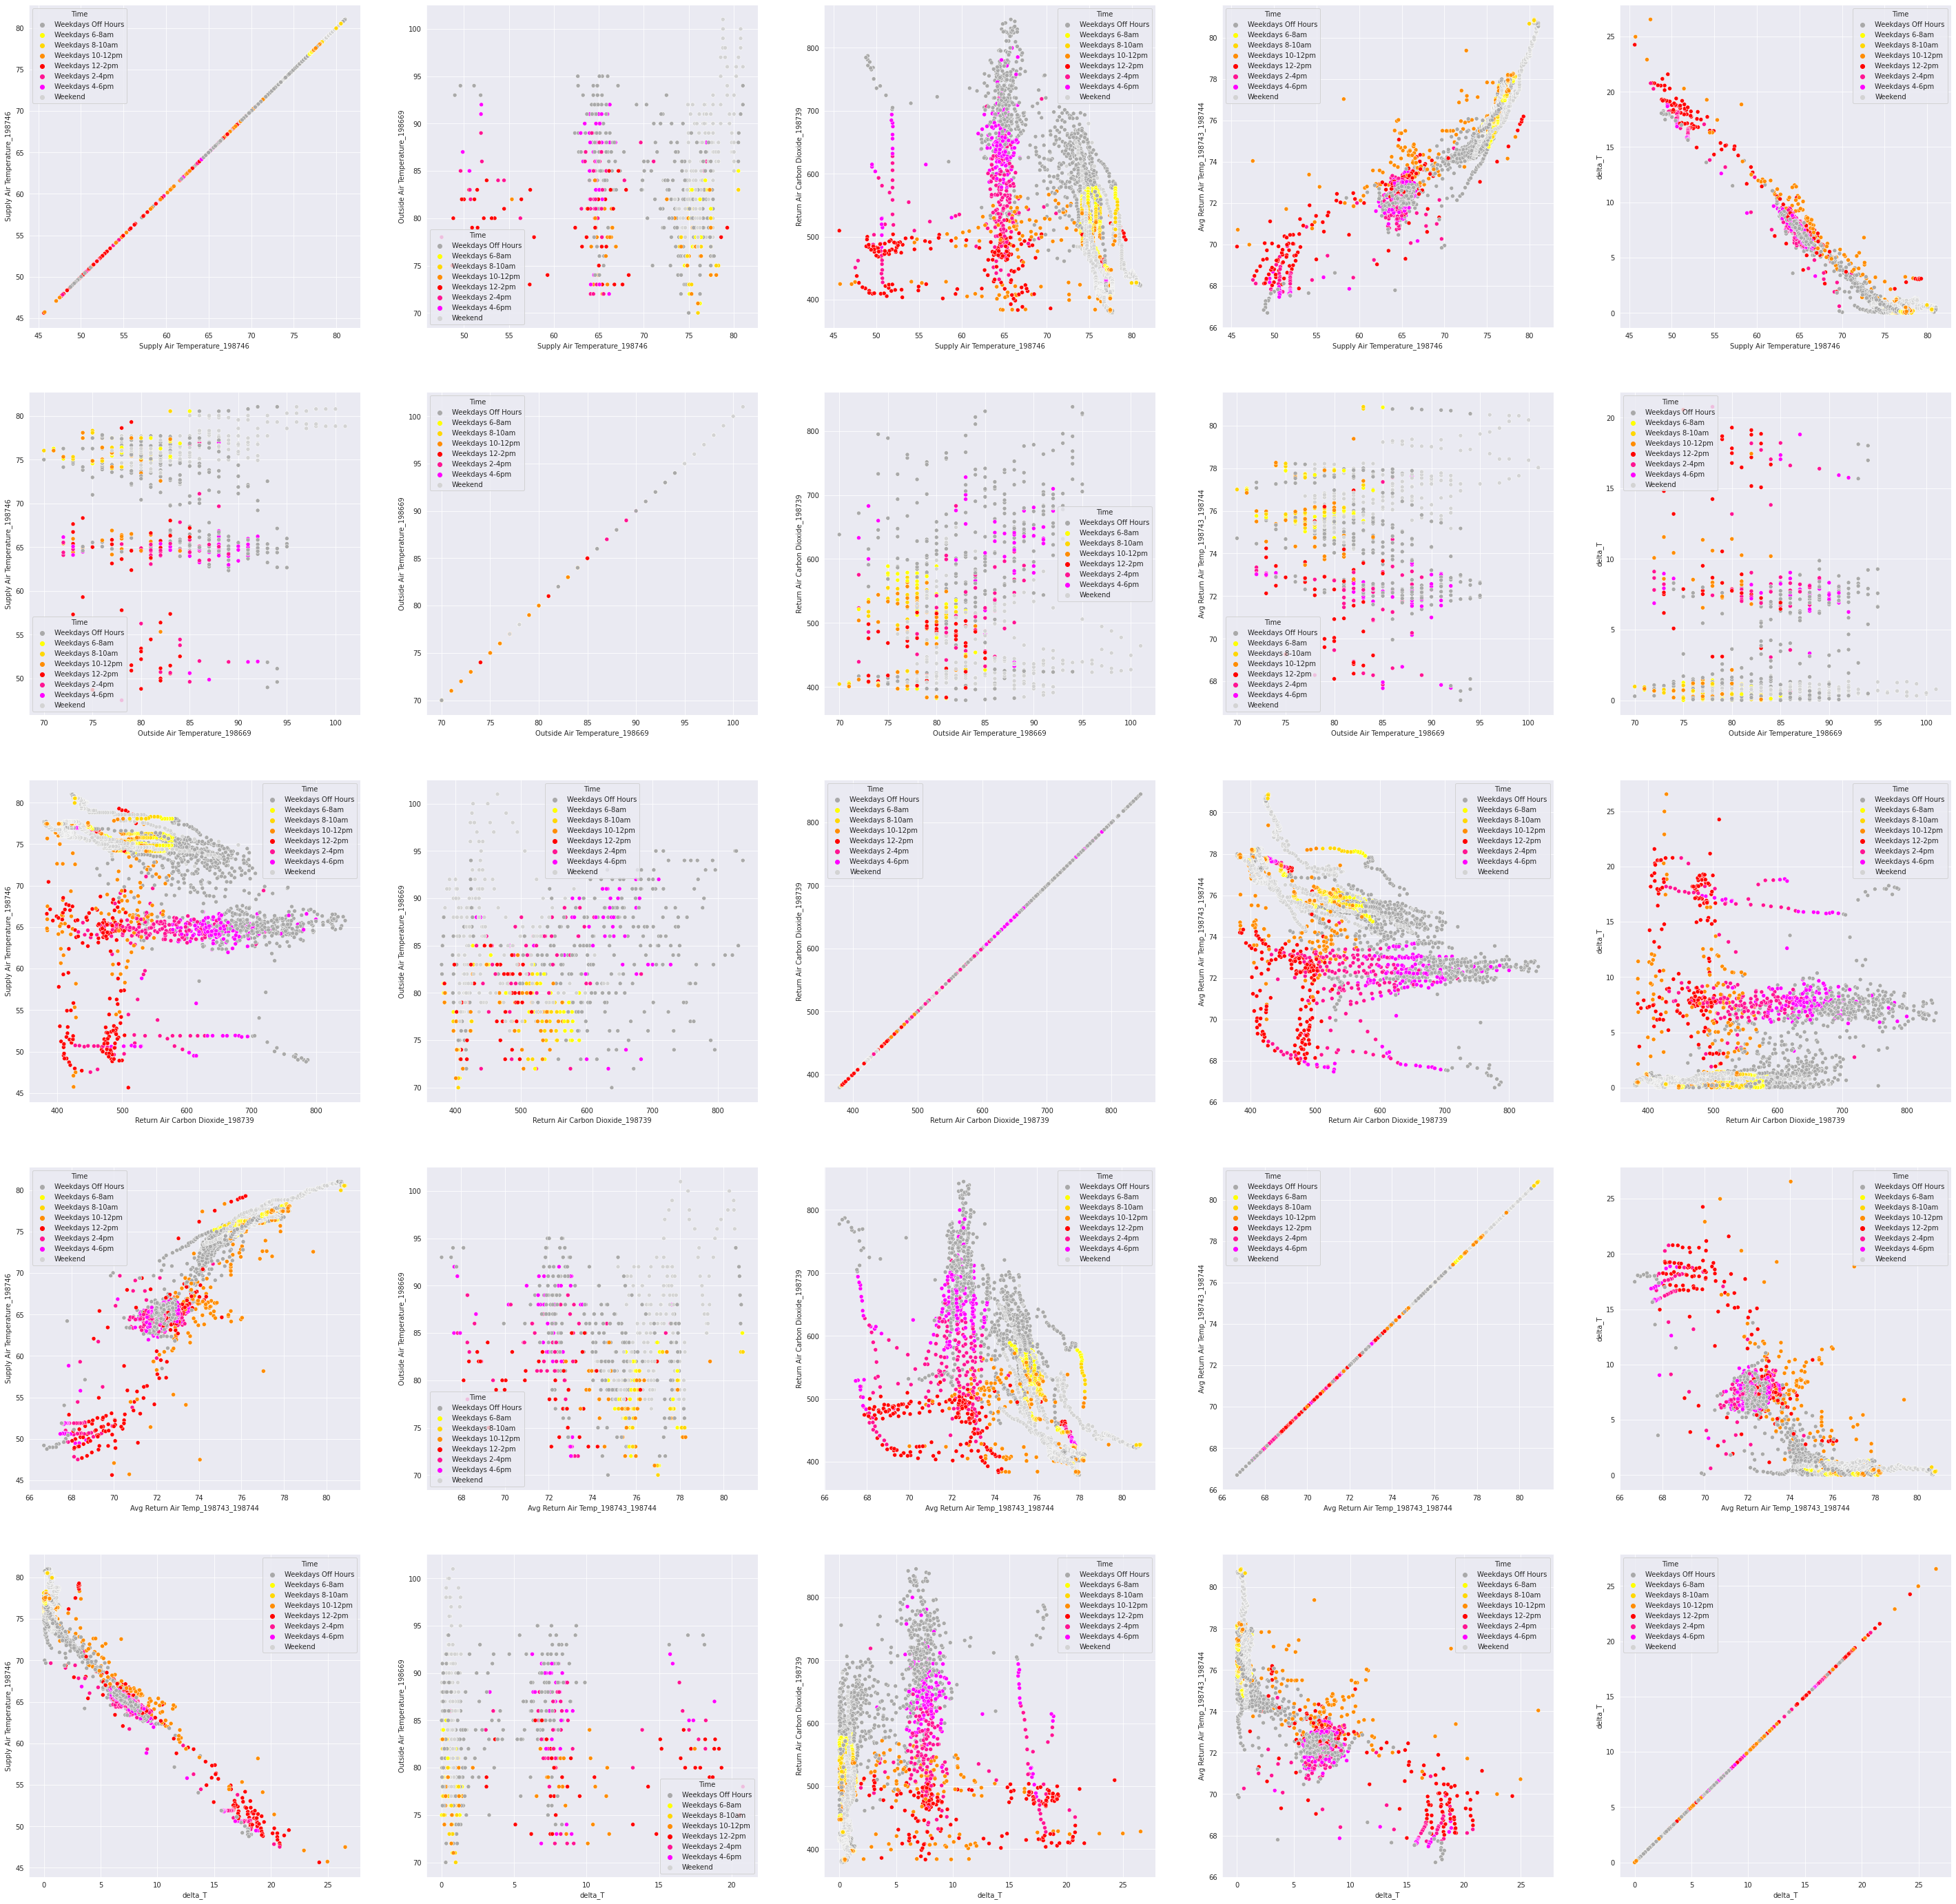

In [111]:
cols = timeseries_b146_f15_renamed.columns.tolist()[:-1] #get all columns except last one 'Time'
fig,ax = plt.subplots(len(cols),len(cols),figsize=(len(cols)*10,len(cols)*10))
markers = dict({'Weekend':'o', 'Weekdays Off Hours':'o','Weekdays 6-8am':'^',
               'Weekdays 8-10am':'^','Weekdays 10-12pm':'^','Weekdays 12-2pm':'^',
               'Weekdays 2-4pm':'^','Weekdays 4-6pm':'^'})
#sizes = {'Weekend': 50, 'Weekday': 100}
colors = dict({'Weekend':'lightgray', 'Weekdays Off Hours':'darkgray','Weekdays 6-8am':'yellow',
               'Weekdays 8-10am':'gold','Weekdays 10-12pm':'darkorange','Weekdays 12-2pm':'red',
               'Weekdays 2-4pm':'deeppink','Weekdays 4-6pm':'fuchsia'})

sns.set_style('darkgrid')
for i in np.arange(len(cols)):
  for j in np.arange(len(cols)):
    sns.set_style('darkgrid')
    sns.scatterplot(ax=ax[i][j],data=timeseries_b146_f15_renamed,x=cols[i],y=cols[j],hue='Time',palette=colors, markers=markers)

plt.savefig('timeseries_b146_f15_final.png',bbox_inches='tight') 
files.download('timeseries_b146_f15_final.png')

In [ ]:
"""
cols = timeseries_b146_f15_diffs_renamed.columns.tolist()[:-1] #get all columns except last one 'Time'
fig,ax = plt.subplots(len(cols),len(cols),figsize=(len(cols)*10,len(cols)*10))
markers = {'Weekend': 'o', 'Weekday': '^'}
sizes = {'Weekend': 50, 'Weekday': 100}

for i in np.arange(len(cols)):
  for j in np.arange(len(cols)):
    sns.scatterplot(ax=ax[i][j],data=timeseries_b146_f15_diffs_renamed,x=cols[i],y=cols[j],hue='Time',palette=colors,markers=markers)

#plt.savefig('timeseries_b146_f15_diffs_v5.png',bbox_inches='tight') 
#files.download('timeseries_b146_f15_diffs_v5.png')
"""

In [ ]:
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

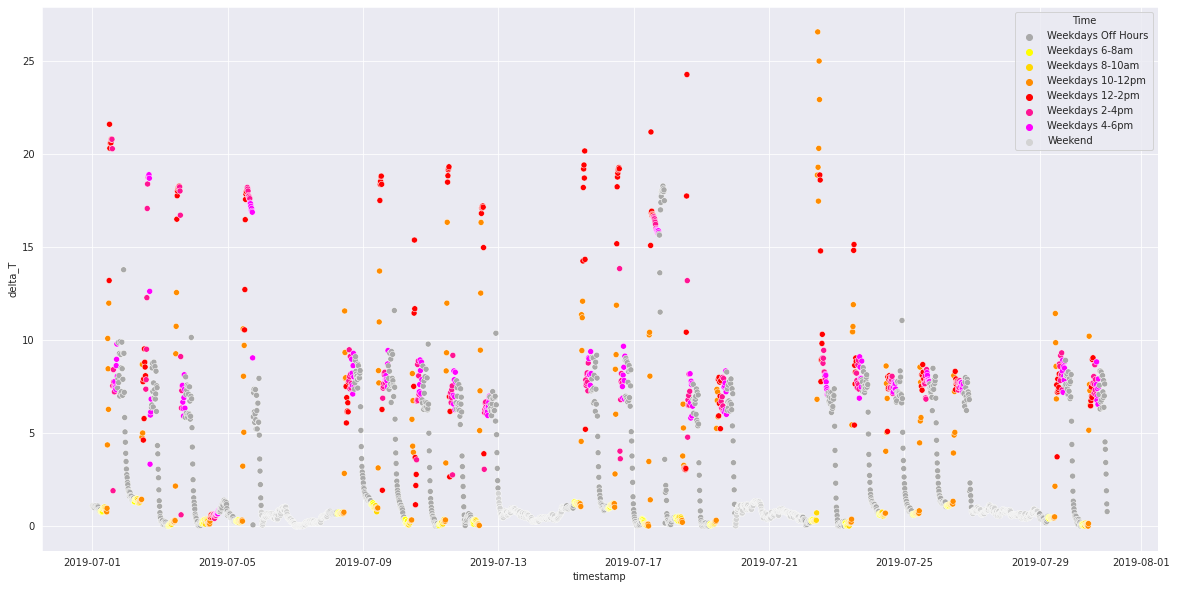

In [113]:

fig,ax = plt.subplots(1,1,figsize=(20,10))

colors = dict({'Weekend':'lightgray', 'Weekdays Off Hours':'darkgray','Weekdays 6-8am':'yellow',
               'Weekdays 8-10am':'gold','Weekdays 10-12pm':'darkorange','Weekdays 12-2pm':'red',
               'Weekdays 2-4pm':'deeppink','Weekdays 4-6pm':'fuchsia'})
sns.set_style('darkgrid')
sns.scatterplot(ax=ax,data=timeseries_b146_f15_renamed,x=timeseries_b146_f15_renamed.index, y='delta_T',hue='Time',palette=colors)
#sns.scatterplot(ax=ax,data=timeseries_b286_f6_renamed,x=timeseries_b286_f6_renamed.index, y=15)
#sns.scatterplot(ax=ax,data=timeseries_b286_f6_renamed,x=timeseries_b286_f6_renamed.index, y=22)

plt.savefig('deltat_timeseries_b146_final.png') 
files.download('deltat_timeseries_b146_final.png')

